# Loading the CelebA dataset

In [1]:
import numpy as np
import torch
import torchvision
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import transforms


In [2]:
image_path = './'
celeba_train_dataset = torchvision.datasets.CelebA(
    image_path, split='train',
    target_type='attr', download=False
)
celeba_valid_dataset = torchvision.datasets.CelebA(
    image_path, split='valid',
    target_type='attr', download=False
)
celeba_test_dataset = torchvision.datasets.CelebA(
    image_path, split='test',
    target_type='attr', download=False
)
print('Train set:', len(celeba_train_dataset))
print('Validation set:', len(celeba_valid_dataset))
print('Test set:', len(celeba_test_dataset))


Train set: 162770
Validation set: 19867
Test set: 19962


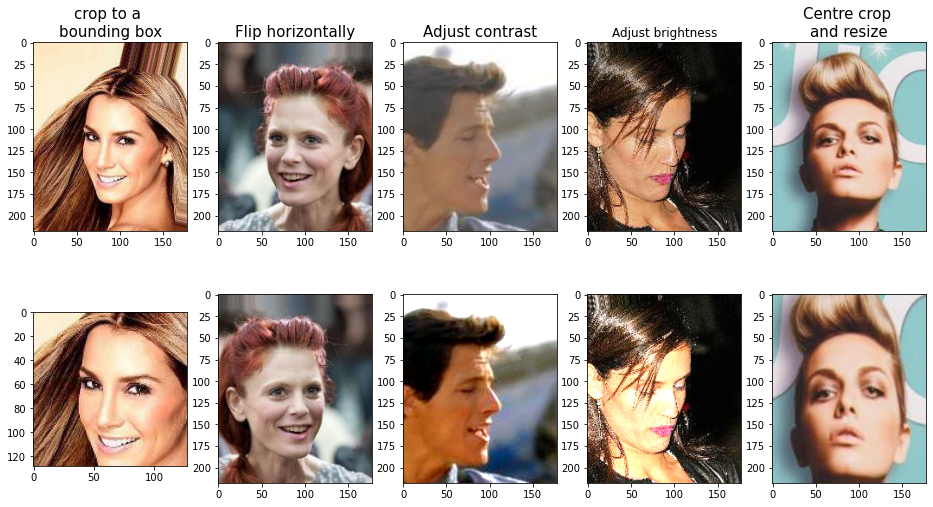

In [3]:
fig = plt.figure(figsize=(16, 8.5))
# Column 1: cropping to a bounding-box
ax = fig.add_subplot(2, 5, 1)
img, attr = celeba_train_dataset[0]
ax.set_title('crop to a \nbounding box', size=15)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 6)
img_cropped = transforms.functional.crop(img, 50, 20, 128, 128)
ax.imshow(img_cropped)

# Column 2: flipping (horizontally)
ax = fig.add_subplot(2, 5, 2)
img, attr = celeba_train_dataset[1]
ax.set_title('Flip horizontally', size=15)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 7)
img_flipped = transforms.functional.hflip(img)
ax.imshow(img_flipped)

# Column 3: adjust contrast
ax = fig.add_subplot(2, 5, 3)
img, attr = celeba_train_dataset[2]
ax.set_title('Adjust contrast', size=15)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 8)
img_adj_contrast = transforms.functional.adjust_contrast(
    img, contrast_factor=2)
ax.imshow(img_adj_contrast)

# Column 4: adjust brightness
ax = fig.add_subplot(2, 5, 4)
img, attr = celeba_train_dataset[3]
ax.set_title('Adjust brightness')
ax.imshow(img)
ax = fig.add_subplot(2, 5, 9)
img_adj_bright = transforms.functional.adjust_brightness(
    img, brightness_factor=1.5)
ax.imshow(img_adj_bright)

# Column 5: cropping from image center
ax = fig.add_subplot(2, 5, 5)
img, attr = celeba_train_dataset[4]
ax.set_title('Centre crop \nand resize', size=15)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 10)
img_centre_crop = transforms.functional.center_crop(img, [0.7 * 218, 0.7*218])
img_resized = transforms.functional.resize(img_centre_crop, size=(218, 178))
ax.imshow(img_resized)
plt.show()


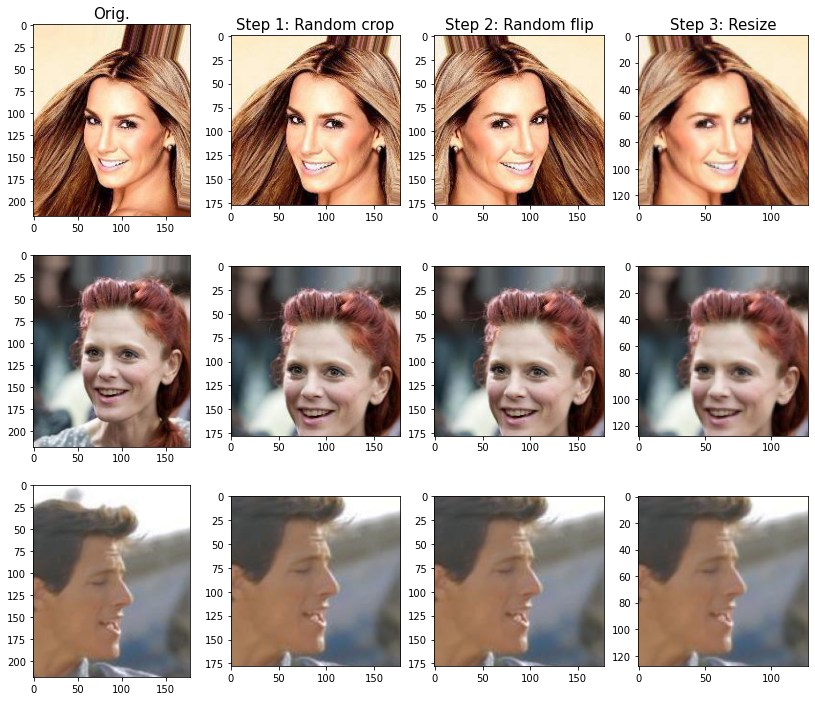

In [4]:
# a pipeline of random crop, random flip and a reszie
torch.manual_seed(1)
fig = plt.figure(figsize=(14, 12))
for i, (img, attr) in enumerate(celeba_train_dataset):
    ax = fig.add_subplot(3, 4, i*4+1)
    ax.imshow(img)
    if i == 0:
        ax.set_title('Orig.', size=15)

    ax = fig.add_subplot(3, 4, i*4+2)
    img_transform = transforms.Compose([
        transforms.RandomCrop([178, 178])
    ])
    img_cropped = img_transform(img)
    ax.imshow(img_cropped)
    if i == 0:
        ax.set_title('Step 1: Random crop', size=15)

    ax = fig.add_subplot(3, 4, i*4+3)
    img_transform = transforms.Compose([
        transforms.RandomHorizontalFlip()
    ])
    img_flip = img_transform(img_cropped)
    ax.imshow(img_flip)
    if i == 0:
        ax.set_title('Step 2: Random flip', size=15)

    ax = fig.add_subplot(3, 4, i*4+4)
    img_resized = transforms.functional.resize(img_flip, size=(128, 128))
    ax.imshow(img_resized)
    if i == 0:
        ax.set_title('Step 3: Resize', size=15)
    if i == 2:
        break

plt.show()


In [5]:
def get_simle(attr): return attr[18]


In [6]:
# We will only apply data augmentation to the training examples
transform_train = transforms.Compose([
    transforms.RandomCrop([178, 178]),
    transforms.RandomHorizontalFlip(),
    transforms.Resize([64, 64]),
    transforms.ToTensor()
])


In [7]:
transform = transforms.Compose([
    transforms.CenterCrop([178, 178]),
    transforms.Resize([64, 64]),
    transforms.ToTensor()
])


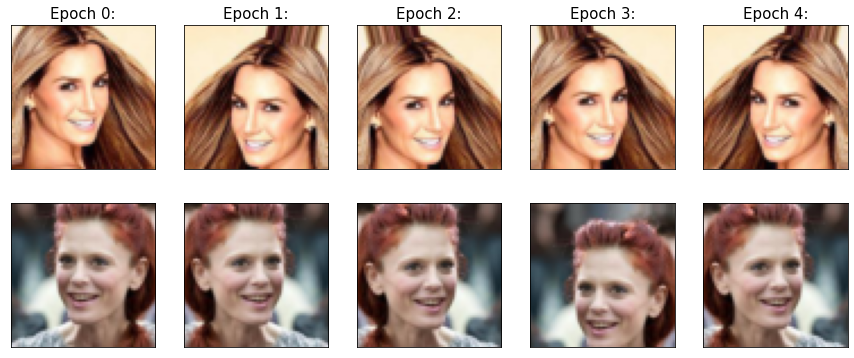

In [9]:
# apply the transform_train function to our training dataset and iterate over the dataset five times
from torch.utils.data import DataLoader
celeba_train_dataset = torchvision.datasets.CelebA(
    root=image_path, split='train',
    target_type='attr', download=False,
    transform=transform_train, target_transform=get_simle
)
torch.manual_seed(1)
data_loader = DataLoader(celeba_train_dataset, batch_size=2)
fig = plt.figure(figsize=(15, 6))
num_epochs = 5
for j in range(num_epochs):
    img_batch, label_batch = next(iter(data_loader))
    img = img_batch[0]
    ax = fig.add_subplot(2, 5, j+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Epoch {j}:', size=15)
    ax.imshow(img.permute(1, 2, 0))

    img = img_batch[1]
    ax = fig.add_subplot(2, 5, j+6)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img.permute(1, 2, 0))

plt.show()


In [55]:
# Next, we will apply the transform function to our validation and test datasets
celeba_valid_dataset = torchvision.datasets.CelebA(
    root=image_path, split='valid',
    target_type='attr', download=False,
    transform=transform, target_transform=get_simle
)
celeba_test_dataset = torchvision.datasets.CelebA(
    root=image_path, split='test',
    target_type='attr', download=False,
    transform=transform, target_transform=get_simle
)


In [11]:
# we will take a subset of 16,000 training examples and 1,000 examples for validation,
# as our goal here is to intentionally train our model with a small dataset
from torch.utils.data import Subset

celeba_train_dataset = Subset(celeba_train_dataset, torch.arange(16000))
celeba_valid_dataset = Subset(celeba_valid_dataset, torch.arange(1000))

print('Train set: ', len(celeba_train_dataset))
print('Validation set', len(celeba_valid_dataset))


Train set:  16000
Validation set 1000


In [56]:
# create data loaders for three datasets
batch_size = 32
torch.manual_seed(1)
train_dl = DataLoader(celeba_train_dataset, batch_size, shuffle=True)
valid_dl = DataLoader(celeba_valid_dataset, batch_size, shuffle=False)
test_dl = DataLoader(celeba_test_dataset, batch_size, shuffle=False)


# Training a CNN smile classifier

*   The CNN model receives input images of size 3×64×64
*   The input data goes through four convolutional layers to make 32, 64, 128, and 256 feature maps
*   We use filters with a kernel size of 3×3 and padding of 1 for same padding
*   The first three convolution layers are followed by max-pooling
*   Two dropout layers are also included for regularization


In [13]:
model = nn.Sequential()

##### First set ######
model.add_module(
    'conv1',
    nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
)
model.add_module(
    'relu1',
    nn.ReLU()
)
model.add_module(
    'pool1',
    nn.MaxPool2d(kernel_size=2)
)
model.add_module(
    'dropout1',
    nn.Dropout(p=0.5)
)

##### Second set ######
model.add_module(
    'conv2',
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
)
model.add_module(
    'relu2',
    nn.ReLU()
)
model.add_module(
    'pool2',
    nn.MaxPool2d(kernel_size=2)
)
model.add_module(
    'dropout2',
    nn.Dropout(p=0.5)
)

##### Third set ######
model.add_module(
    'conv3',
    nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
)
model.add_module(
    'relu3',
    nn.ReLU()
)
model.add_module(
    'pool3',
    nn.MaxPool2d(kernel_size=2)
)
model.add_module(
    'dropout3',
    nn.Dropout(p=0.5)
)

##### Fourth set ######
model.add_module(
    'conv4',
    nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
)
model.add_module(
    'relu4',
    nn.ReLU()
)


In [14]:
# Let’s see the shape of the output feature maps after applying these layers using a toy batch input
x = torch.ones(4, 3, 64, 64)
model(x).shape


torch.Size([4, 256, 8, 8])

We will add a global average pooling layer to reduce the output to 256 (instead of 8\*8\*256).

Then add a flatten layer, followed by a fully connected layer, then Sigmoid acitvation.

In [15]:
model.add_module(
    'pool4',
    # kernel size=8 beacuse the previous layers output the final images in size 256 * 8 * 8
    nn.AvgPool2d(kernel_size=8)
)
model.add_module(
    'flatten',
    nn.Flatten()
)

# test the model's output
x = torch.ones(4, 3, 64, 64)
model(x).shape


torch.Size([4, 256])

In [16]:
# Finally, add an FC layer to get a single output unit that is passed to Sigmoid activation

model.add_module(
    'FC',
    nn.Linear(in_features=256, out_features=1)
)
model.add_module(
    'sigmoid',
    nn.Sigmoid()
)


In [23]:
x = torch.ones(4, 3, 64, 64)
print(model(x)[:, 0])


tensor([0.5053, 0.5043, 0.4992, 0.5041], grad_fn=<SelectBackward0>)


In [18]:
model(x).shape


torch.Size([4, 1])

In [19]:
model


Sequential(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.5, inplace=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout3): Dropout(p=0.5, inplace=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu4): ReLU()
  (pool4): AvgPool2d(kernel_size=8, stride=8, padding=0)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (FC): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [20]:
# The next step is to create a loss function and optimizer (Adam optimizer again).
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


For explaination of how a simple training step works, run the following code:

`tdl = DataLoader(celeba_train_dataset, batch_size=1, shuffle=False)` # a simple dataloader

`q,w =  next(iter(tdl))` # get an item from the dataloader. q--> image (features), w--> target

`p = model(q)[:, 0]` # make a prediction

`print(p)` # show the output of the model, which is a probability generated by the Sigmoid

`print(w)` # show the true target value

we know that if the probability is >= 0.5, then it belongs to class 1, otherwise, it belongs to the other class.
this prints a vector where the values are True (when the probability >=0.5) or False (when the probabililty < 0.5)

`print(p>=0.5)`

compare with the true target vector. Is the True prediction corresponds to True? Is the False prediction corresponds to False?

`print((p>=0.5) == w)`

In [49]:
def train(model, num_epochs, train_dl, valid_dl):
    loss_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs

    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch.float())
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = ((pred >= 0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum()
        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)

        model.eval()
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                pred = model(x_batch)[:, 0]
                loss = loss_fn(pred, y_batch.float())
                loss_hist_valid[epoch] += loss.item()*y_batch.size(0)
                is_correct = ((pred >= 0.5).float() == y_batch).float()
                accuracy_hist_valid[epoch] += is_correct.sum()
            loss_hist_valid[epoch] /= len(valid_dl.dataset)
            accuracy_hist_valid[epoch] /= len(valid_dl.dataset)

        print(
            f'Epoch {epoch+1} accuracy: ' f'{accuracy_hist_train[epoch]:.4f} val_accuracy: ' f'{accuracy_hist_valid[epoch]:.4f}')

    return loss_hist_train, loss_hist_valid, \
        accuracy_hist_train, accuracy_hist_valid


In [ ]:
# To avoid errors that appear in the middle of the training process (maybe after a long time), run the following simple training
# tdl = DataLoader(Subset(celeba_train_dataset, torch.arange(2)), batch_size=2)
# vdl = DataLoader(Subset(celeba_valid_dataset, torch.arange(2)), batch_size=2)
# hist = train(model, 1, tdl, vdl)


In [51]:
torch.manual_seed(1)
num_epochs = 3
hist = train(model, num_epochs, train_dl, valid_dl)


Epoch 1 accuracy: 0.7049 val_accuracy: 0.7440
Epoch 2 accuracy: 0.7154 val_accuracy: 0.7140
Epoch 3 accuracy: 0.7282 val_accuracy: 0.7600


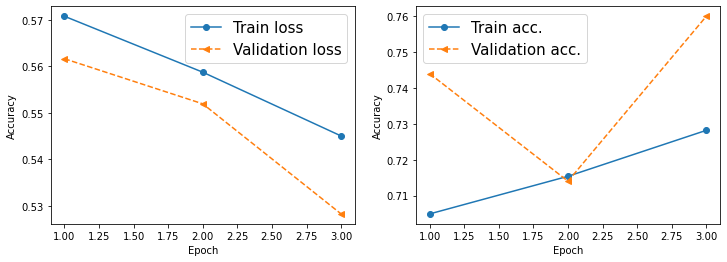

In [53]:
# Let’s now visualize the learning curve and compare the training and validation loss and accuracies after each epoch
x_arr = np.arange(len(hist[0]))+1
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-o', label='Train acc.')
ax.plot(x_arr, hist[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')

plt.show()


In [57]:
# evaluate the model on the hold-out test dataset
accuracy_test = 0
model.eval()
with torch.no_grad():
    for x_batch, y_batch in test_dl:
        pred = model(x_batch)[:, 0]
        is_correct = ((pred >= 0.5).float() == y_batch).float()
        accuracy_test += is_correct.sum()

accuracy_test /= len(test_dl.dataset)
print(f'Test accuracy: {accuracy_test:.4f}')


Test accuracy: 0.7232


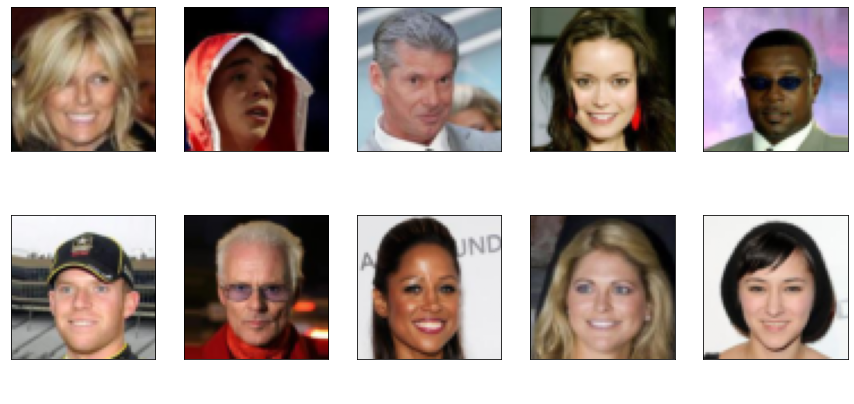

In [60]:
# visualize the examples along with their ground truth label and the predicted probabilities
pred = model(x_batch)[:, 0] * 100
fig = plt.figure(figsize=(15, 7))

for j in range(10, 20):
    ax = fig.add_subplot(2, 5, j-10+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(x_batch[j].permute(1, 2, 0))
    if y_batch[j] == 1:
        label = 'Simle'
    else:
        label = 'Not smile'
    ax.text(0.5, -0.15,
            f'GT: {label:s}\nPr(Smile)={pred[j]:.0f}%',
            size=16, color='w',
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)

plt.show()
